<a href="https://colab.research.google.com/github/sayu0303/FCE_EQ_2025/blob/main/MIRELLA_FCE_IVP_080725.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
#Definição das bibliotecas utilizadas

import matplotlib.pyplot as plt
from dataclasses import dataclass
import numpy as np
from scipy.integrate import solve_ivp #integrar a EDO



In [113]:
@dataclass
class ParametrosAquecimento:
  T0: float = 25.0 # temperatura inicial (°C)
  Q: float = 5000.0 # coef. transferencia de calor
  U: float = 150.0
  A: float = 5.0
  ta: float = 25.0 # temperatura ambiente
  m: float = 50.0 # massa (kg)
  cp: float = 1670.0

In [114]:
def modelo_aquecimento(t, T, par):
  """
  FUNÇÃO MODELO EQUAÇÃO DIFERENCIAL

  """
  Q, U, A, ta, m, cp = par.Q, par.U, par.A, par.ta, par.m, par.cp
  dTdt = (Q - U*A*(T - ta))/(m*cp)

  return dTdt

def simula_aquecimento(tempo,par):
  """
  FUNÇÃO SIMULAÇÃO EQUAÇÃO DIFERENCIAL

  """

  T0 = par.T0
  teval = np.linspace(tempo[0], tempo[-1], 100)
  sol = solve_ivp(modelo_aquecimento, tempo, [T0], t_eval=teval, args=(par,), method = 'BDF')

  return sol.t, sol.y[0]


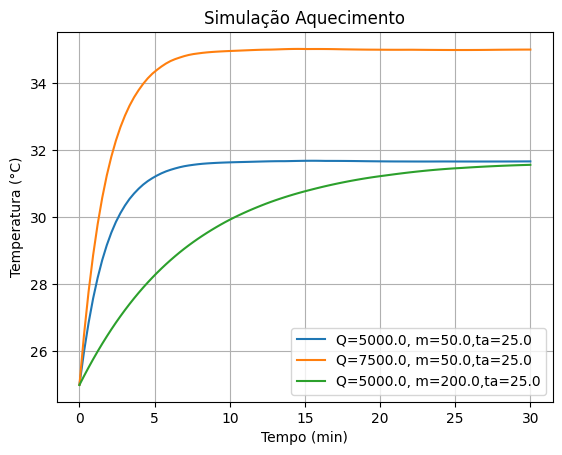

In [115]:
conjunto = [ParametrosAquecimento(),
            ParametrosAquecimento(Q=7500.0),
            ParametrosAquecimento(m=200.0)]
tempo = [0,30*60] # usando o tempo em segundos (s)

for params in conjunto:
  t, T = simula_aquecimento(tempo, params) # meu t é o tempo
  Q, m, ta = params.Q, params.m, params.ta
  plt.plot(t/60, T, label = f"Q={Q}, m={m},ta={ta}")

plt.xlabel("Tempo (min)")
plt.ylabel("Temperatura (°C)")
plt.title("Simulação Aquecimento")
plt.grid()
plt.legend()
plt.show()



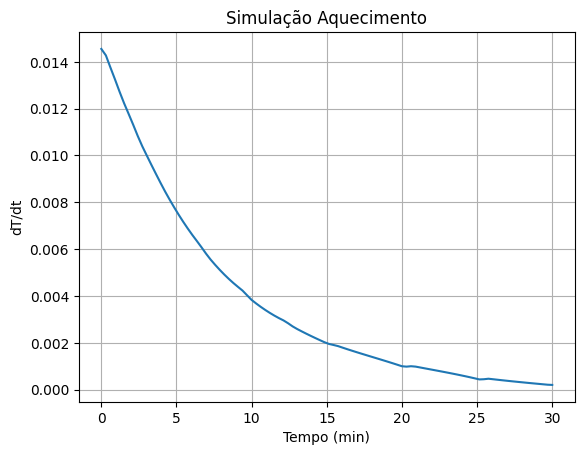

In [116]:
dTdt = np.gradient(T,t)

import pandas as pd

resultado = pd.DataFrame({'t': t, 'T': T, 'dT/dt': dTdt})
resultado.to_csv('resultado.csv', index=False)

plt.plot(t/60, dTdt)
plt.xlabel("Tempo (min)")
plt.ylabel("dT/dt")
plt.title("Simulação Aquecimento")
plt.grid()
plt.show()

In [117]:
import pandas as pd

resultado = pd.DataFrame({'t': t, 'T': T, 'dT/dt': dTdt})
resultado.to_csv('resultado.csv', index=False)


In [118]:
params = ParametrosAquecimento()
tempo = [0,30*60] # usando o tempo em segundos (s)
t, T = simula_aquecimento(tempo, params)